# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

In [2]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [4]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [5]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

In [18]:
#========== Celda 1: Importar librerías y configurar semillas (corregida) ==========#
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, Activation
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# (Opcional) Para reproducibilidad:
np.random.seed(42)
keras.utils.set_random_seed(42)




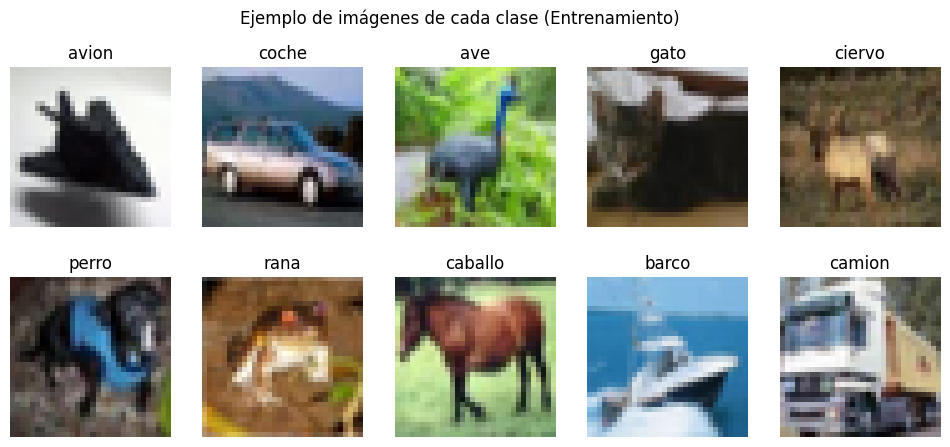

In [17]:
#========== Celda 2: Carga y preprocesamiento de datos ==========#
# 1. Carga
(X_full, Y_full), (x_test, y_test) = keras.datasets.cifar10.load_data()

# 2. División train/valid
x_train = X_full[:40000]
y_train = Y_full[:40000]
x_valid = X_full[40000:]
y_valid = Y_full[40000:]

# 3. Normalización
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# 4. One-hot encoding
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_valid_cat = to_categorical(y_valid, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# 5. Mapeo de índices a nombres
class_names = {
    0: 'avion', 1: 'coche', 2: 'ave', 3: 'gato', 4: 'ciervo',
    5: 'perro', 6: 'rana', 7: 'caballo', 8: 'barco', 9: 'camion'
}

# 6. Mostrar un ejemplo de cada clase
plt.figure(figsize=(12, 5))
cont = 0
for cls in range(10):
    idx = np.where(y_train.flatten() == cls)[0][0]
    cont += 1
    plt.subplot(2, 5, cont)
    plt.imshow(x_train[idx])
    plt.title(f"{class_names[cls]}")
    plt.axis('off')
plt.suptitle("Ejemplo de imágenes de cada clase (Entrenamiento)")
plt.show()


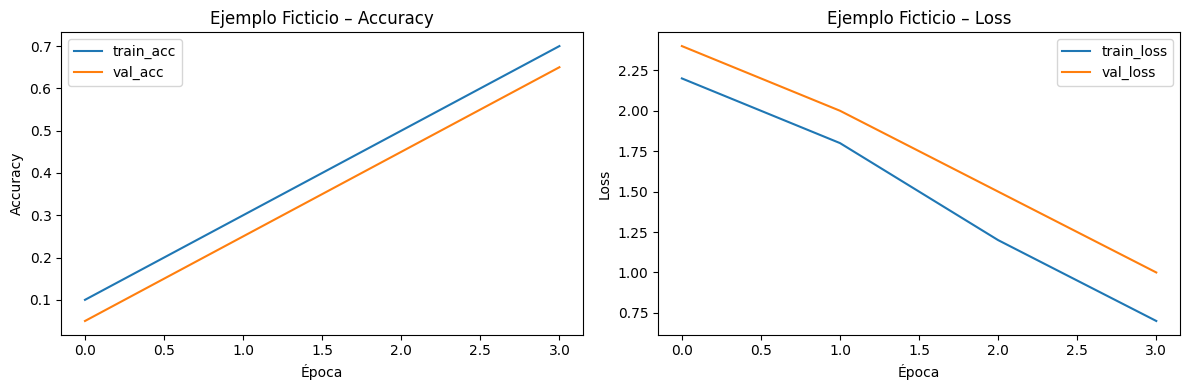

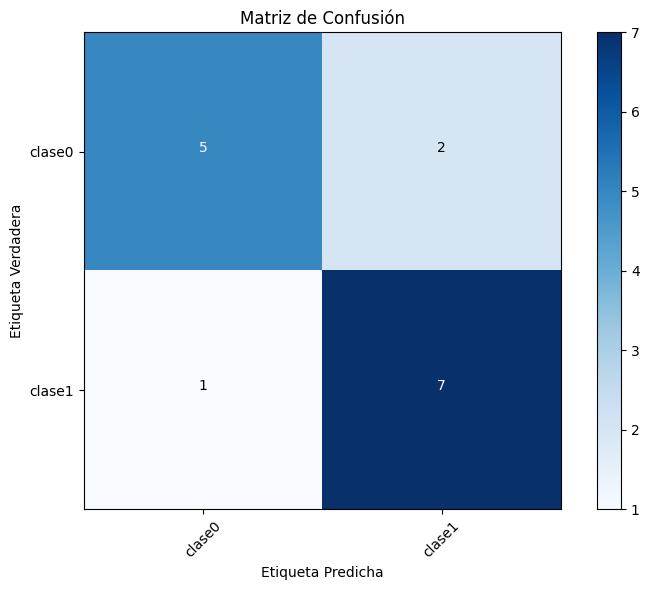

In [16]:
#========== Celda 3: Definición de funciones auxiliares + ejemplo de uso ==========#
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_accuracy_and_loss(history, title):
    plt.figure(figsize=(12,4))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f'{title} – Accuracy')
    plt.xlabel('Época')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{title} – Loss')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Matriz de Confusión")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()
    plt.show()

#=== Ejemplo ficticio para verificar que las funciones funcionan ===#
# Creamos un objeto con la misma estructura que Keras devuelve en history
class DummyHistory:
    pass

history_ejemplo = DummyHistory()
history_ejemplo.history = {
    'accuracy':    [0.10, 0.30, 0.50, 0.70],
    'val_accuracy':[0.05, 0.25, 0.45, 0.65],
    'loss':        [2.20, 1.80, 1.20, 0.70],
    'val_loss':    [2.40, 2.00, 1.50, 1.00]
}

# Llamada de prueba: muestra las gráficas de accuracy y loss
plot_accuracy_and_loss(history_ejemplo, "Ejemplo Ficticio")

# Creamos una matriz de confusión de ejemplo (2x2)
cm_ejemplo = np.array([[5, 2],
                       [1, 7]])
# Llamada de prueba: muestra la matriz de confusión
plot_confusion_matrix(cm_ejemplo, ['clase0', 'clase1'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/12
313/313 - 6s - 21ms/step - accuracy: 0.2325 - loss: 2.0834 - val_accuracy: 0.3165 - val_loss: 1.9176
Epoch 2/12
313/313 - 1s - 3ms/step - accuracy: 0.2755 - loss: 1.9551 - val_accuracy: 0.3164 - val_loss: 1.8980
Epoch 3/12
313/313 - 1s - 3ms/step - accuracy: 0.2900 - loss: 1.9148 - val_accuracy: 0.3296 - val_loss: 1.8739
Epoch 4/12
313/313 - 1s - 5ms/step - accuracy: 0.2947 - loss: 1.8990 - val_accuracy: 0.3531 - val_loss: 1.8581
Epoch 5/12
313/313 - 1s - 4ms/step - accuracy: 0.3027 - loss: 1.8831 - val_accuracy: 0.3381 - val_loss: 1.8613
Epoch 6/12
313/313 - 1s - 3ms/step - accuracy: 0.3088 - loss: 1.8671 - val_accuracy: 0.3493 - val_loss: 1.8671
Epoch 7/12
313/313 - 1s - 4ms/step - accuracy: 0.3209 - loss: 1.8458 - val_accuracy: 0.3703 - val_loss: 1.8341
Epoch 8/12
313/313 - 1s - 4ms/step - accuracy: 0.3212 - loss: 1.8378 - val_accuracy: 0.3713 - val_loss: 1.8213
Epoch 9/12
313/313 - 1s - 4ms/step - accuracy: 0.3261 - loss: 1.8326 - val_accuracy: 0.3556 - val_loss: 1.8346


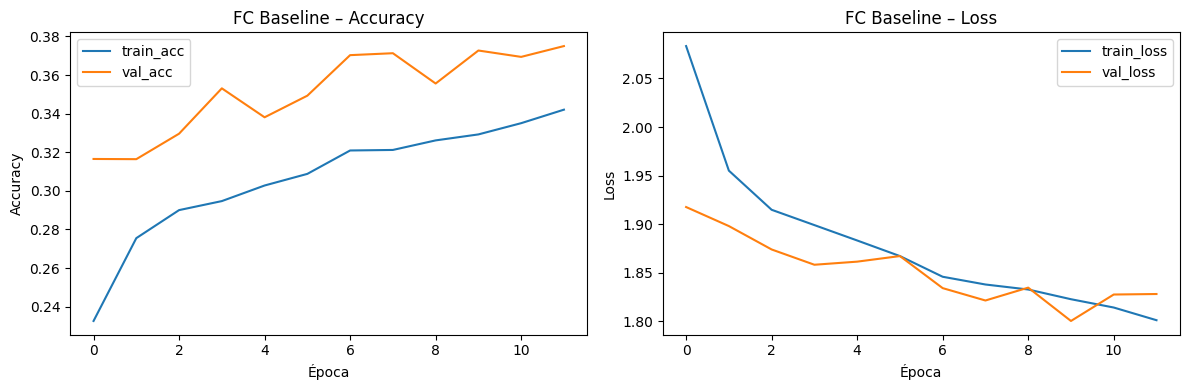

In [19]:
#========== Celda 4: Modelo 1 – Fully Connected (baseline) ==========#
def build_fc_baseline():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

fc_model = build_fc_baseline()
history_fc = fc_model.fit(
    x_train, y_train_cat,
    epochs=12,
    batch_size=128,
    validation_data=(x_valid, y_valid_cat),
    verbose=2
)
plot_accuracy_and_loss(history_fc, "FC Baseline")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/18
313/313 - 8s - 25ms/step - accuracy: 0.4184 - loss: 1.6161 - val_accuracy: 0.5106 - val_loss: 1.3785
Epoch 2/18
313/313 - 2s - 5ms/step - accuracy: 0.5518 - loss: 1.2615 - val_accuracy: 0.5649 - val_loss: 1.2444
Epoch 3/18
313/313 - 3s - 9ms/step - accuracy: 0.6090 - loss: 1.1220 - val_accuracy: 0.5984 - val_loss: 1.1441
Epoch 4/18
313/313 - 2s - 7ms/step - accuracy: 0.6426 - loss: 1.0317 - val_accuracy: 0.6125 - val_loss: 1.1057
Epoch 5/18
313/313 - 2s - 7ms/step - accuracy: 0.6671 - loss: 0.9617 - val_accuracy: 0.6200 - val_loss: 1.0831
Epoch 6/18
313/313 - 1s - 5ms/step - accuracy: 0.6856 - loss: 0.9054 - val_accuracy: 0.6351 - val_loss: 1.0411
Epoch 7/18
313/313 - 3s - 8ms/step - accuracy: 0.7053 - loss: 0.8559 - val_accuracy: 0.6480 - val_loss: 1.0158
Epoch 8/18
313/313 - 3s - 8ms/step - accuracy: 0.7206 - loss: 0.8123 - val_accuracy: 0.6506 - val_loss: 1.0153
Epoch 9/18
313/313 - 3s - 9ms/step - accuracy: 0.7323 - loss: 0.7772 - val_accuracy: 0.6562 - val_loss: 1.0102


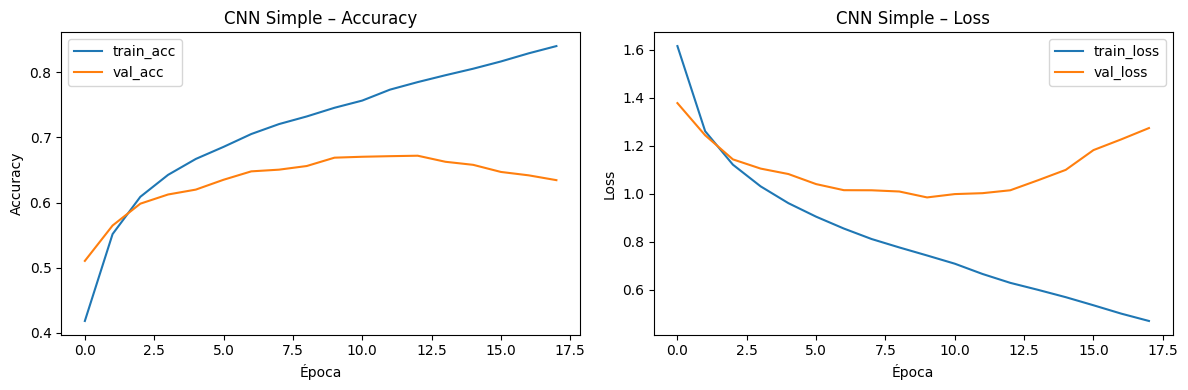

In [20]:
#========== Celda 5: Modelo 2 – CNN simple ==========#
def build_simple_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

simple_cnn = build_simple_cnn()
history_simple = simple_cnn.fit(
    x_train, y_train_cat,
    epochs=18,
    batch_size=128,
    validation_data=(x_valid, y_valid_cat),
    verbose=2
)
plot_accuracy_and_loss(history_simple, "CNN Simple")


Epoch 1/30
625/625 - 19s - 31ms/step - accuracy: 0.4215 - loss: 1.6124 - val_accuracy: 0.4489 - val_loss: 1.5897
Epoch 2/30
625/625 - 6s - 10ms/step - accuracy: 0.5872 - loss: 1.1546 - val_accuracy: 0.6360 - val_loss: 1.0317
Epoch 3/30
625/625 - 5s - 8ms/step - accuracy: 0.6562 - loss: 0.9775 - val_accuracy: 0.6739 - val_loss: 0.9024
Epoch 4/30
625/625 - 5s - 8ms/step - accuracy: 0.6936 - loss: 0.8696 - val_accuracy: 0.6948 - val_loss: 0.8790
Epoch 5/30
625/625 - 10s - 16ms/step - accuracy: 0.7210 - loss: 0.7960 - val_accuracy: 0.6907 - val_loss: 0.9136
Epoch 6/30
625/625 - 5s - 8ms/step - accuracy: 0.7444 - loss: 0.7378 - val_accuracy: 0.6793 - val_loss: 0.9372
Epoch 7/30
625/625 - 5s - 8ms/step - accuracy: 0.7624 - loss: 0.6903 - val_accuracy: 0.7255 - val_loss: 0.8194
Epoch 8/30
625/625 - 5s - 9ms/step - accuracy: 0.7772 - loss: 0.6516 - val_accuracy: 0.7581 - val_loss: 0.6869
Epoch 9/30
625/625 - 10s - 17ms/step - accuracy: 0.7872 - loss: 0.6157 - val_accuracy: 0.7324 - val_loss: 0

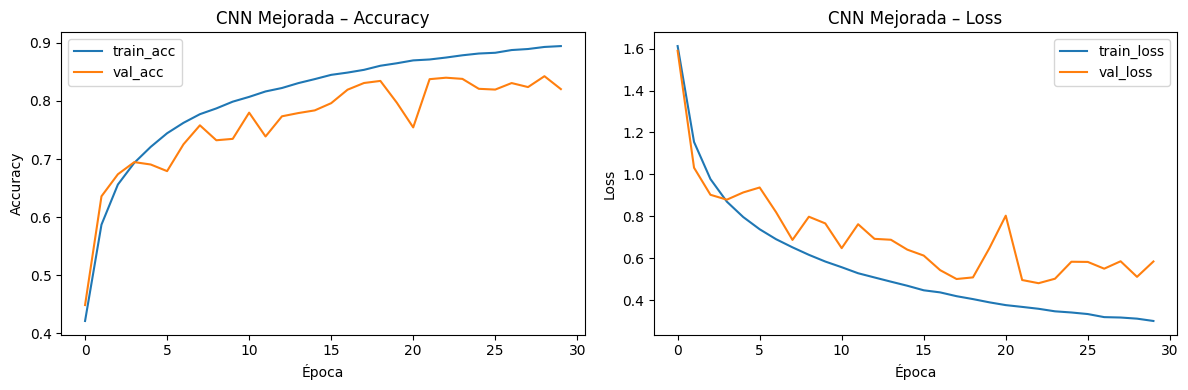

In [21]:
#========== Celda 6: Modelo 3 – CNN mejorada ==========#
def build_improved_cnn():
    model = Sequential()
    # Bloque 1
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    # Bloque 2
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    # Bloque 3
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    # Clasificador Fully Connected
    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compilación
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

improved_cnn = build_improved_cnn()
history_improved = improved_cnn.fit(
    x_train, y_train_cat,
    epochs=30,
    batch_size=64,
    validation_data=(x_valid, y_valid_cat),
    verbose=2
)
plot_accuracy_and_loss(history_improved, "CNN Mejorada")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 - 33s - 53ms/step - accuracy: 0.7765 - loss: 0.6855 - val_accuracy: 0.8183 - val_loss: 0.5524
Epoch 2/30
625/625 - 23s - 36ms/step - accuracy: 0.7900 - loss: 0.6212 - val_accuracy: 0.8422 - val_loss: 0.4759
Epoch 3/30
625/625 - 22s - 36ms/step - accuracy: 0.7921 - loss: 0.6130 - val_accuracy: 0.8200 - val_loss: 0.5558
Epoch 4/30
625/625 - 22s - 35ms/step - accuracy: 0.7992 - loss: 0.5929 - val_accuracy: 0.8327 - val_loss: 0.4833
Epoch 5/30
625/625 - 43s - 69ms/step - accuracy: 0.8037 - loss: 0.5857 - val_accuracy: 0.8387 - val_loss: 0.4762
Epoch 6/30
625/625 - 39s - 63ms/step - accuracy: 0.8061 - loss: 0.5781 - val_accuracy: 0.8143 - val_loss: 0.5458
Epoch 7/30
625/625 - 23s - 36ms/step - accuracy: 0.8067 - loss: 0.5678 - val_accuracy: 0.8454 - val_loss: 0.4503
Epoch 8/30
625/625 - 22s - 36ms/step - accuracy: 0.8122 - loss: 0.5619 - val_accuracy: 0.8241 - val_loss: 0.5173
Epoch 9/30
625/625 - 42s - 67ms/step - accuracy: 0.8136 - loss: 0.5540 - val_accuracy: 0.8011 - val_loss: 0

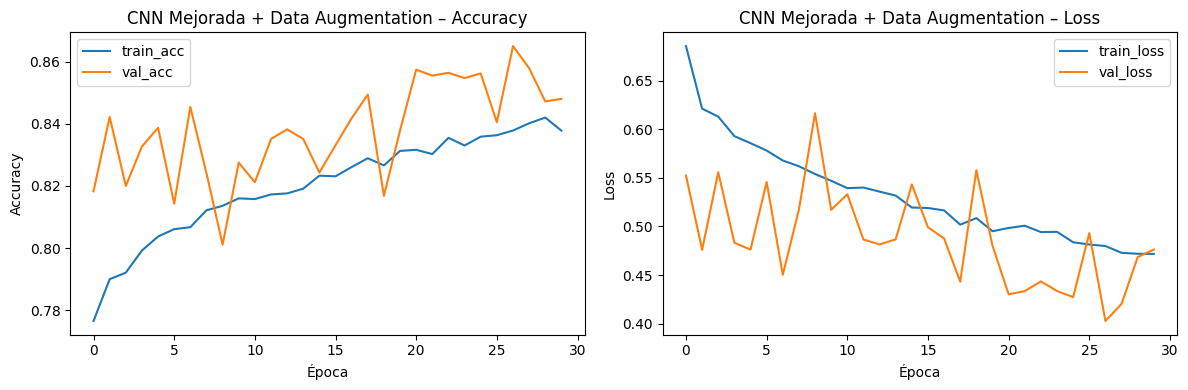

In [22]:
#========== Celda 7 (Opcional): CNN mejorada + Data Augmentation ==========#
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

batch_size = 64
steps_per_epoch = x_train.shape[0] // batch_size

history_augmented = improved_cnn.fit(
    datagen.flow(x_train, y_train_cat, batch_size=batch_size),
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    validation_data=(x_valid, y_valid_cat),
    verbose=2
)
plot_accuracy_and_loss(history_augmented, "CNN Mejorada + Data Augmentation")



>>> Test Loss: 0.4972   |   Test Accuracy: 0.8440

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
==== Classification Report (por clase) ====
              precision    recall  f1-score   support

       avion       0.82      0.89      0.85      1000
       coche       0.90      0.94      0.92      1000
         ave       0.85      0.75      0.80      1000
        gato       0.85      0.58      0.69      1000
      ciervo       0.80      0.88      0.84      1000
       perro       0.88      0.68      0.77      1000
        rana       0.85      0.92      0.88      1000
     caballo       0.83      0.92      0.87      1000
       barco       0.88      0.94      0.91      1000
      camion       0.80      0.94      0.87      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



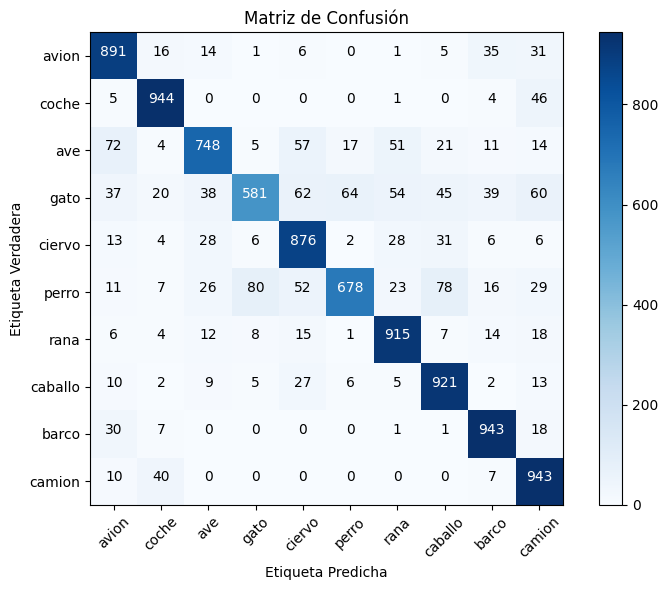

In [23]:
#========== Celda 8: Evaluación en Test e informe de clasificación ==========#
# Seleccionar el "mejor modelo" según val_acc (p. ej., improved_cnn o improved_cnn con augmentación)
best_model = improved_cnn  # o bien history_augmented si superó en val_accuracy

# Evaluación
test_loss, test_acc = best_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n>>> Test Loss: {test_loss:.4f}   |   Test Accuracy: {test_acc:.4f}\n")

# Predicciones
y_pred_probs = best_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Classification Report
print("==== Classification Report (por clase) ====")
print(classification_report(y_true, y_pred,
                            target_names=[class_names[i] for i in range(num_classes)]))

# Matriz de Confusión
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, [class_names[i] for i in range(num_classes)])


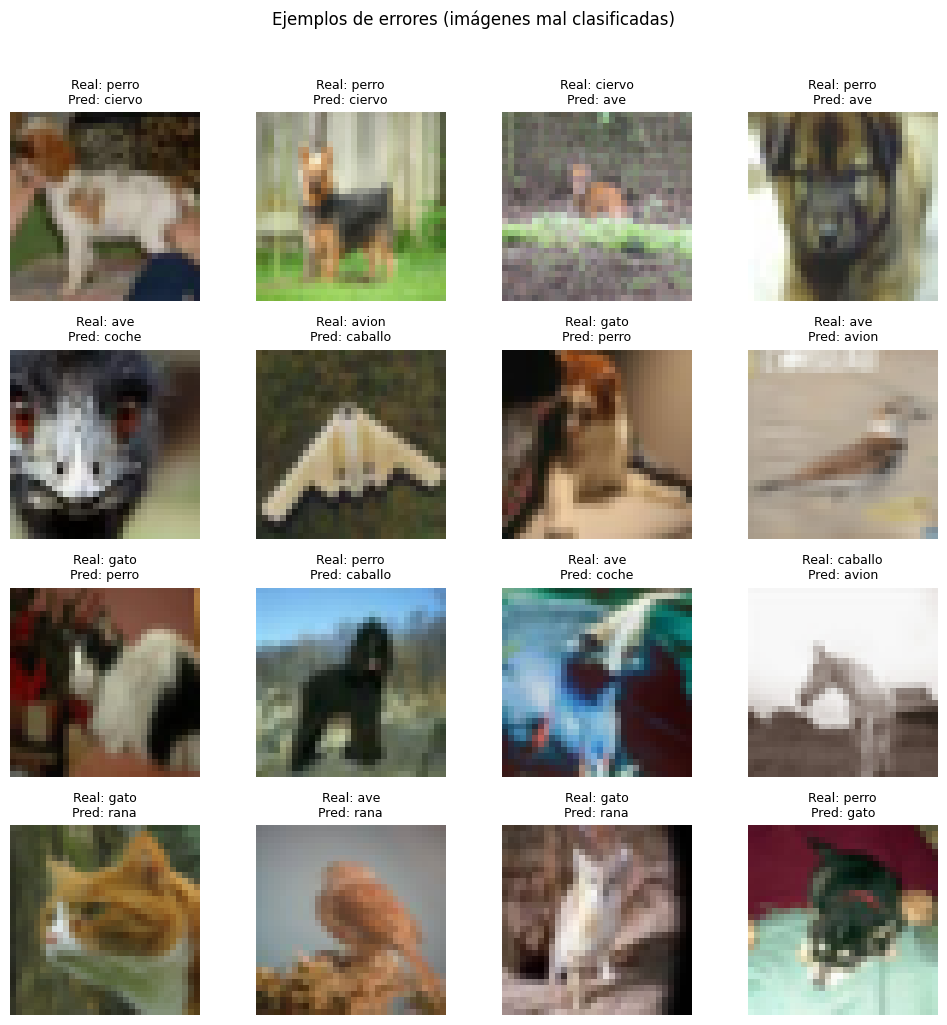

In [24]:
#========== Celda 9: Visualización de ejemplos mal clasificados ==========#
miscls_idx = np.where(y_pred != y_true)[0]

plt.figure(figsize=(10,10))
for i, idx in enumerate(miscls_idx[:16]):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[idx])
    true_lbl = class_names[y_true[idx]]
    pred_lbl = class_names[y_pred[idx]]
    plt.title(f"Real: {true_lbl}\nPred: {pred_lbl}", fontsize=9)
    plt.axis('off')

plt.suptitle("Ejemplos de errores (imágenes mal clasificadas)", y=1.02)
plt.tight_layout()
plt.show()
